#### **Análisis de principales característica del exito y abandono escolar**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

**Carga de datos**

In [2]:
df = pd.read_csv('../data_raw/dataset.csv')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,5,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,10,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,10,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,5,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


**Diferencias entre exito y abandono demografica y socioeconomicamente**

<Axes: ylabel='Displaced'>

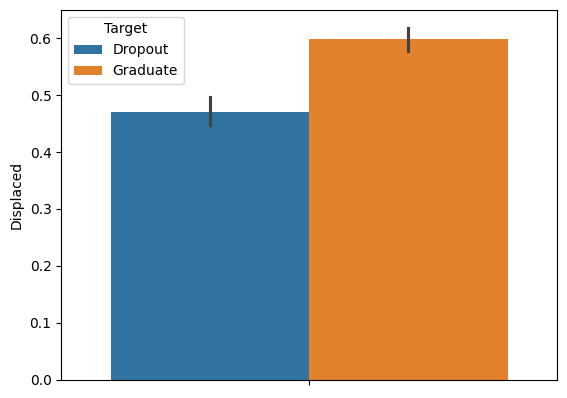

In [12]:
filter_target=df[df['Target'].isin(['Graduate','Dropout'])]
sns.barplot(data=filter_target, y='Displaced',hue='Target')

- Encontramos como los estudiantes graduados tienden a presentar una mayoría de desplazamientos.

<Axes: ylabel='Gender'>

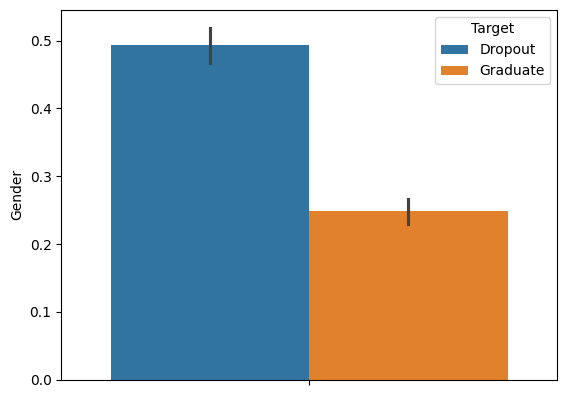

In [10]:
filter_target=df[df['Target'].isin(['Graduate','Dropout'])]
sns.barplot(data=filter_target, y='Gender',hue='Target')

- La mayoría de estudiantes que abandonaron son de genero masculino, frente a los que se graduaron, siendo más mujeres que hombres.

In [18]:
dropout_students = filter_target[filter_target['Target']=='Dropout']
sucess_student = filter_target[filter_target['Target']=='Graduate']

mean_age_dropout = np.mean(dropout_students['Age at enrollment'].values)
mean_age_sucess = np.mean(sucess_student['Age at enrollment'].values)

print(f'La media de edad en matriculación de los estudiantes que abandonan es de: {round(mean_age_dropout)} años')
print(f'La media de edad en matriculación de los estudiantes que tienen exito es de: {round(mean_age_sucess)} años')

La media de edad en matriculación de los estudiantes que abandonan es de: 26 años
La media de edad en matriculación de los estudiantes que tienen exito es de: 22 años


- Observamos como los estudiantes con exito en sus estudios tienen a ser más jovenes que los que abandonan.

<Axes: ylabel='Scholarship holder'>

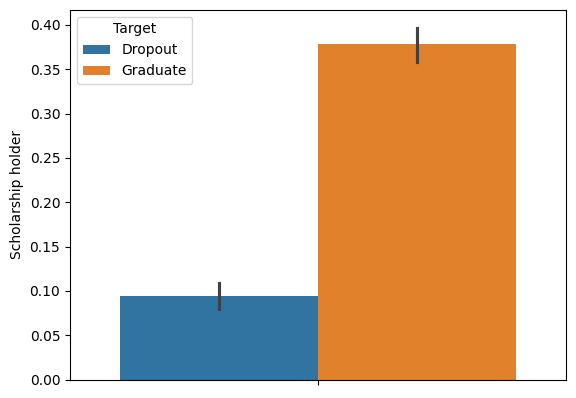

In [33]:
filter_target=df[df['Target'].isin(['Graduate','Dropout'])]
sns.barplot(data=filter_target, y='Scholarship holder',hue='Target')

- Observamos como la mayoría de los estudiantes graduados tienen becas, frente a los que abandonan sin becas.

<Axes: ylabel='Debtor'>

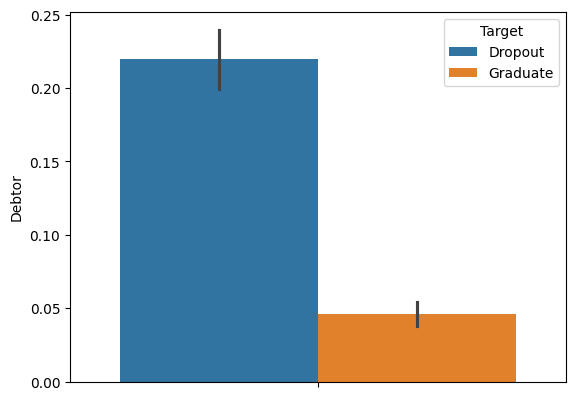

In [34]:
filter_target=df[df['Target'].isin(['Graduate','Dropout'])]
sns.barplot(data=filter_target, y='Debtor',hue='Target')

- Observamos como un mayoría los que abandonan, tienden a presentar más problemas de deudas que los graduados.

**Características macroeconómicas principales entre target**

<Axes: ylabel='GDP'>

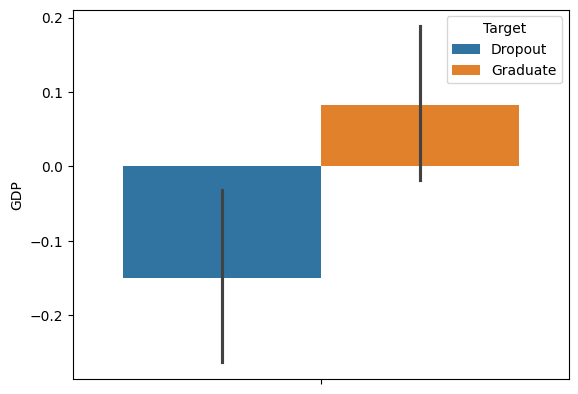

In [44]:
filter_target=df[df['Target'].isin(['Graduate','Dropout'])]
sns.barplot(data=filter_target, y='GDP',hue='Target')

- Los estudiantes que abandonaron, viveron una epoca de bajo PIB. Los que tuvieron exito, la economía presentaba metricas más favorables. Por tanto, al reducirse el PIB, el empleo bajó y viceversa.

**Características academicas entre target**

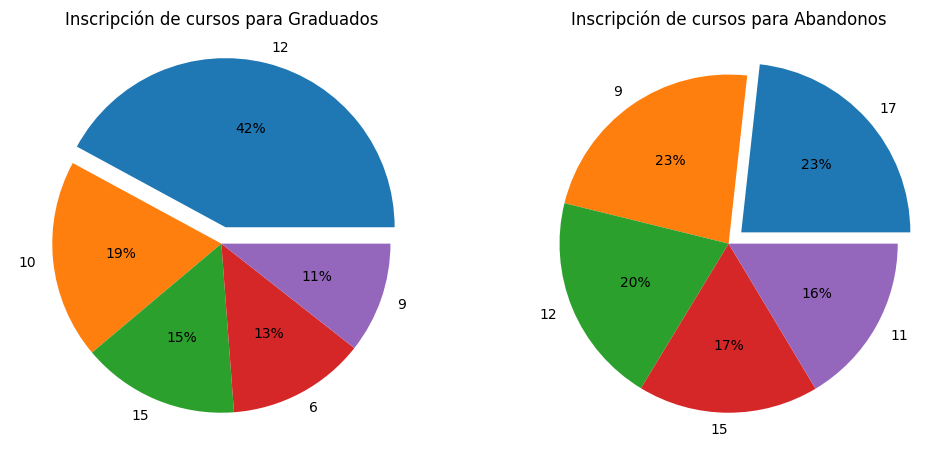

In [58]:
filter_target=df[df['Target'].isin(['Graduate','Dropout'])]
# Agrupar por 'Target' y contar los valores de 'Course' dentro de cada grupo
grouped_data = filter_target.groupby('Target')['Course'].value_counts()

# Obtener los datos solo para los dos primeros grupos (Graduados y Abandonos)
graduates_data = grouped_data['Graduate'][:5]
dropouts_data = grouped_data['Dropout'][:5]

# Etiquetas y tamaños para graduados
graduates_labels = graduates_data.index.tolist()
graduates_sizes = graduates_data.values

# Etiquetas y tamaños para abandonos
dropouts_labels = dropouts_data.index.tolist()
dropouts_sizes = dropouts_data.values

# Crear subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para graduados
axs[0].pie(graduates_sizes, labels=graduates_labels, autopct='%1.0f%%', explode=[0.1] + [0]*4)
axs[0].set_title('Inscripción de cursos para Graduados')

# Gráfico para deserciones
axs[1].pie(dropouts_sizes, labels=dropouts_labels, autopct='%1.0f%%', explode=[0.1] + [0]*4)
axs[1].set_title('Inscripción de cursos para Abandonos')

plt.show()

- Observamos como los graduados tienden a cursos como: Enfermería, Servício social o Periodismo y comunicación. Mientras que los que abandonan, tienden a cursos como: Gestión (turno nocturno y diurno), Enfermería (tercero más solicitado) o Periodismo (cuarto más solicitado).

<Axes: xlabel='Application mode', ylabel='Application order'>

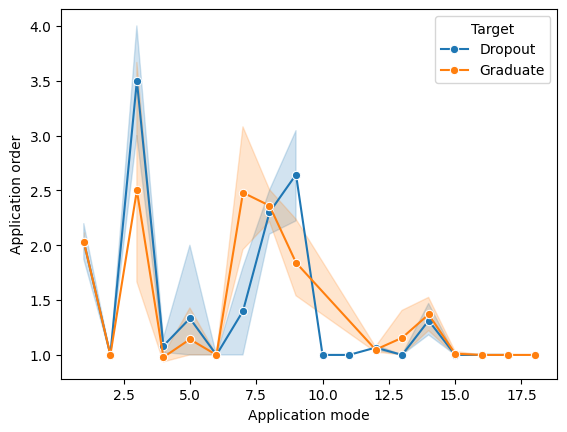

In [57]:
sns.lineplot(data=filter_target, x='Application mode',y='Application order',marker='o', hue='Target')

- Se muestra un entorno tanto en el modo de aplicar al curso como en el orden de aplicación bastante similar. Las inscripciones mas generales (los primeros valores de 'Application mode') tienden a ser los más demandados, por tanto reciben mas colas de espera (ordenes de aplicación).

**Resultados académicos 1º y 2º semestre**

<Axes: ylabel='Curricular units 1st sem (approved)'>

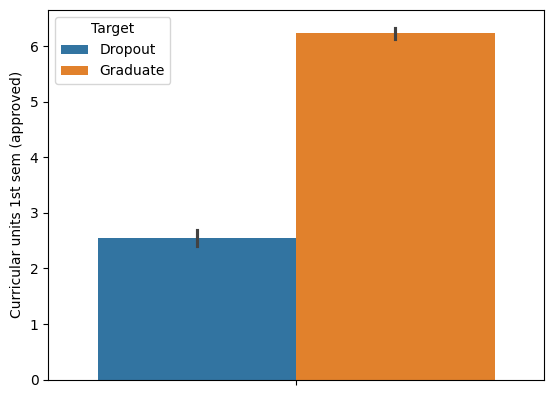

In [61]:
filter_target=df[df['Target'].isin(['Graduate','Dropout'])]
sns.barplot(data=filter_target, y='Curricular units 1st sem (approved)',hue='Target')

- Observamos como una parte de los estudiantes que abandonaron en el primer semestre sus estudios no aprobaron, frente a los graduados, la magnitud de las cifras es considerable.

<Axes: ylabel='Curricular units 1st sem (grade)'>

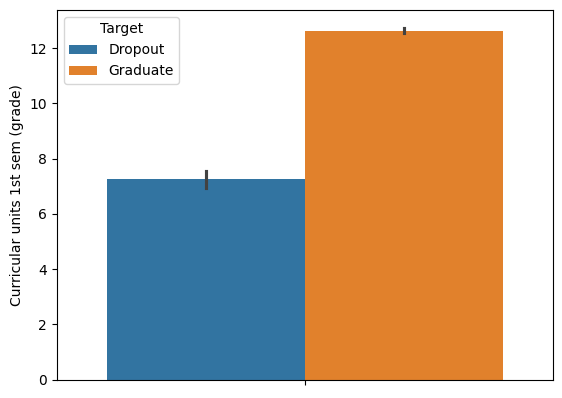

In [62]:
filter_target=df[df['Target'].isin(['Graduate','Dropout'])]
sns.barplot(data=filter_target, y='Curricular units 1st sem (grade)',hue='Target')

- La calificación de los estudiantes que abandonaron el primer semestre se situa en suspenso (<10).

<Axes: ylabel='Curricular units 2nd sem (approved)'>

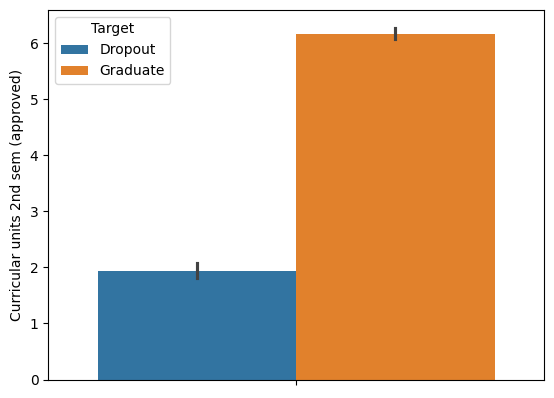

In [64]:
filter_target=df[df['Target'].isin(['Graduate','Dropout'])]
sns.barplot(data=filter_target, y='Curricular units 2nd sem (approved)',hue='Target')

- En el segundo semestre observamos la misma dinámica que en el primero, los estudiantes que abandonaron, suspendieron (incluso más que en el primer semestre).

<Axes: ylabel='Curricular units 2nd sem (grade)'>

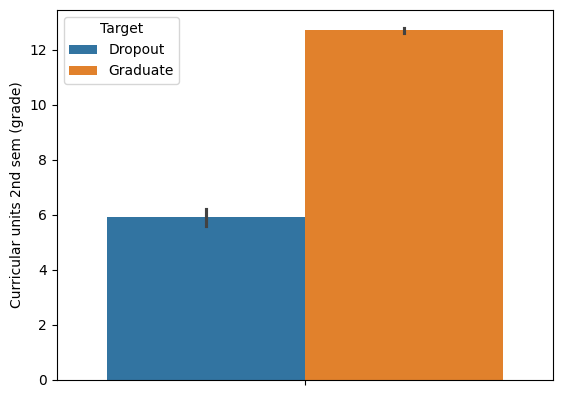

In [65]:
filter_target=df[df['Target'].isin(['Graduate','Dropout'])]
sns.barplot(data=filter_target, y='Curricular units 2nd sem (grade)',hue='Target')

- Las calificaciones en el segundo semestre bajan aún mas para los estudiantes con abandono escolar.

#### **Interpretación de resultados**
Los estudiantes que abandonan frente a los que se graduan sufrieron estas situaciones/características:
- Los hombres tienden a abandonar más que las mujeres.
- No pueden o es más complicado el desplazamiento (frente a los graduados que tienden a desplazarse con más facilidad).
- La edad promedio es de 26 años.
- Dificultas en la obtención o retención de becas.
- Problemas con deudas (frente a los graduados que presentan un caso inferior).
- Macroeconámicamente, vivieron una época de parón/decrecimiento del PIB, afectando más o menos al empleo.
- Los cursos inscritos tienden a estar más enfocados en gestión (los que se gradúan, en enfermería).
- Académicamente, suspenden más asignaturas en ambos semestres. Así mismo, las calificaciones son mucho más bajas que los que terminan graduándose.

Aunque las causas ajenas a lo académico pueden afectar al estudiante, las diferencias en muchos casos sutiles, con respecto a los que se gradúan hacen pensar, que el factor más importante de abandono son las calificaciones y, por ende, el mal rendimiento académico (falta de estudio o interés en las materias).

Siendo el factor académico el más relevante y dispar entre graduados y abandonos.